In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

# Finns and Alcohol Consumption: Do Seasonal Changes in Weather Affect Our Drinking Habits? 
### Sini Suihkonen, Outi Savolainen and Fanni Franssila

In [99]:
def load_xls(file_name:str, year: int):
    dataframes = []
    months = ["Tammi", "Helmi", "Maalis", "Huhti", "Touko", "Kesä", "Heinä", "Elo", "Syys", "Loka", "Marras", "Joulu"]
    months_eng = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    xls = pd.ExcelFile(file_name)
    for (i, month) in enumerate(months):
        name_of_sheet = f"{month}kuu {year}"
        df = pd.read_excel(xls, name_of_sheet,skiprows=[0,1,2], usecols=("I"))
        # Add month column to the dataframe. For example "Tammikuu2020".
        df[f"{months_eng[i]}{year}"] = pd.concat([df.iloc[3:4], df.iloc[14:15], df.iloc[21:22], df.iloc[34:35]])
        # Drop rows with NaNs. After this we have only four rows containing total consumption for all types of alchohol.
        df = df.dropna()
        # Remove the first useless row of the dataframe.
        df = df.iloc[:, 1:]
        # Change index names
        df = df.rename(index={3:"Beer", 14:"Wine", 21:"Strong Wine", 34:"Spirits"})
        dataframes.append(df)
    total = pd.concat(dataframes, axis=1)
    
    return total

alc_data2020 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2020.xlsx", 2020)
alc_data2019 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2019.xlsx", 2019)
alc_data2018 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2018.xlsx", 2018)
alc_data2017 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2017.xlsx", 2017)

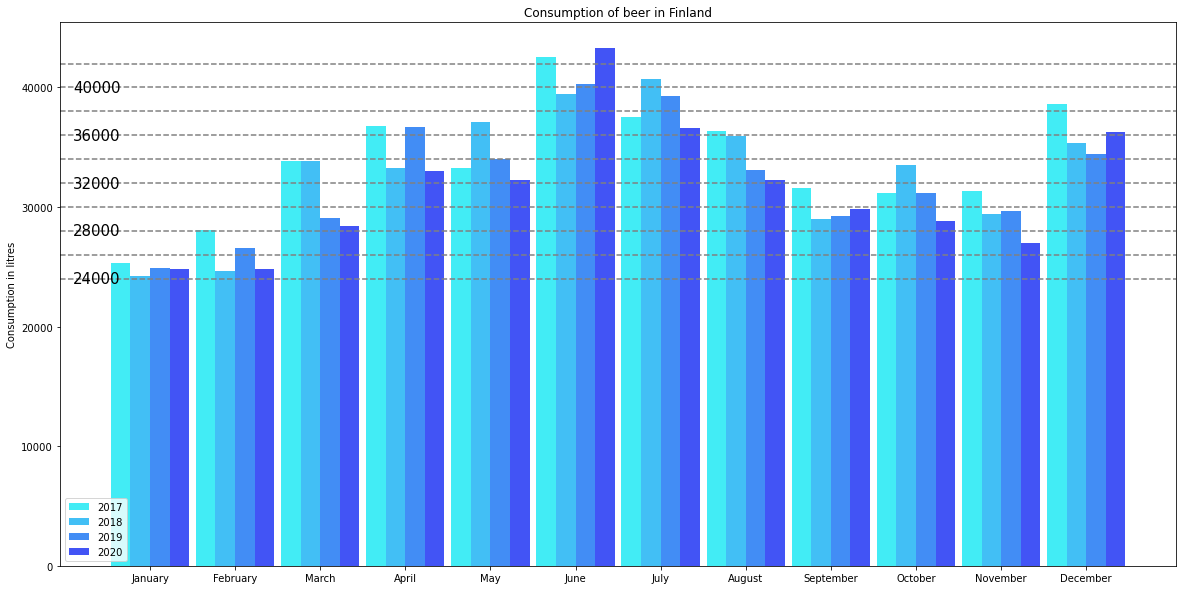

In [100]:
# Be(tt)er plotting
adata2017 = alc_data2017.T.astype(int)
adata2018 = alc_data2018.T.astype(int)
adata2019 = alc_data2019.T.astype(int)
adata2020 = alc_data2020.T.astype(int)

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
beer2020 = adata2020["Beer"].values
beer2019 = adata2019["Beer"].values
beer2018 = adata2018["Beer"].values
beer2017 = adata2017["Beer"].values

width = 0.23
bar1 = np.arange(len(labels))
bar2 = [i + width  for i in bar1]
bar3 = [i + width  for i in bar2]
bar4 = [i + width  for i in bar3]

plt.figure(figsize=(20,10))

plt.bar(bar1, beer2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, beer2018, width, label="2018", color="#42bff5")
plt.bar(bar3, beer2019, width, label="2019", color="#428df5")
plt.bar(bar4, beer2020, width, label="2020", color="#4254f5")

plt.axhline(y=24000, color="grey", linestyle="--")
plt.text(x=0,y=24000, s="24000", fontsize=15, va='center', ha='right' )
plt.axhline(y=26000, color="grey", linestyle="--")
plt.axhline(y=28000, color="grey", linestyle="--")
plt.text(x=0,y=28000, s="28000", fontsize=15, va='center', ha='right' )
plt.axhline(y=30000, color="grey", linestyle="--")
plt.axhline(y=32000, color="grey", linestyle="--")
plt.text(x=0,y=32000, s="32000", fontsize=15, va='center', ha='right' )
plt.axhline(y=34000, color="grey", linestyle="--")
plt.axhline(y=36000, color="grey", linestyle="--")
plt.text(x=0,y=36000, s="36000", fontsize=15, va='center', ha='right' )
plt.axhline(y=38000, color="grey", linestyle="--")
plt.axhline(y=40000, color="grey", linestyle="--")
plt.text(x=0,y=40000, s="40000", fontsize=15, va='center', ha='right' )
plt.axhline(y=42000, color="grey", linestyle="--")

plt.ylabel("Consumption in litres")
plt.title("Consumption of beer in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

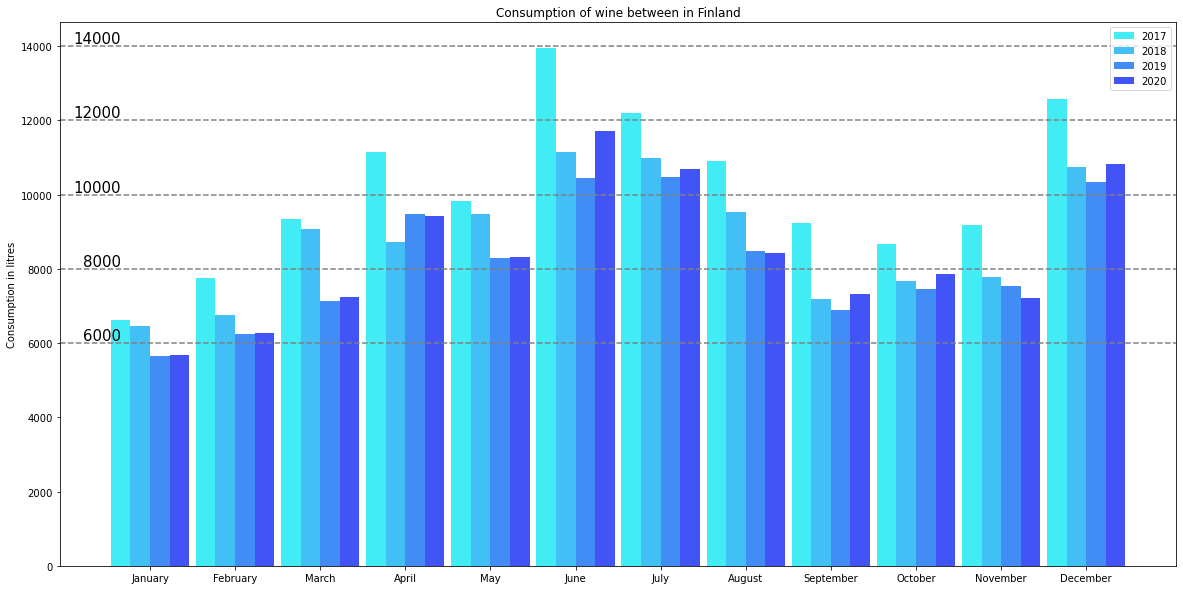

In [101]:
# Wine plotting
wine2020 = adata2020["Wine"].values
wine2019 = adata2019["Wine"].values
wine2018 = adata2018["Wine"].values
wine2017 = adata2017["Wine"].values

plt.figure(figsize=(20,10))

plt.bar(bar1, wine2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, wine2018, width, label="2018", color="#42bff5")
plt.bar(bar3, wine2019, width, label="2019", color="#428df5")
plt.bar(bar4, wine2020, width, label="2020", color="#4254f5")

plt.axhline(y=6000, color="grey", linestyle="--")
plt.text(x=0,y=6000, s="6000", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=8000, color="grey", linestyle="--")
plt.text(x=0,y=8000, s="8000", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=10000, color="grey", linestyle="--")
plt.text(x=0,y=10000, s="10000", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=12000, color="grey", linestyle="--")
plt.text(x=0,y=12000, s="12000", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=14000, color="grey", linestyle="--")
plt.text(x=0,y=14000, s="14000", fontsize=15, va='bottom', ha='right' )

plt.ylabel("Consumption in litres")
plt.title("Consumption of wine between in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

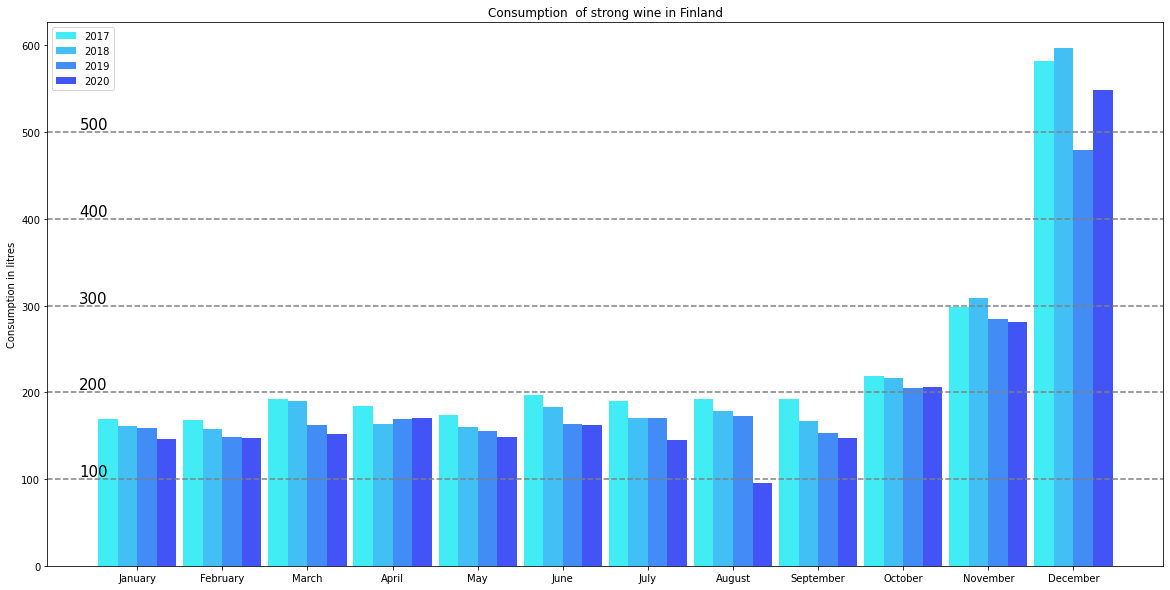

In [102]:
# Wine plotting
s_wine2020 = adata2020["Strong Wine"].values
s_wine2019 = adata2019["Strong Wine"].values
s_wine2018 = adata2018["Strong Wine"].values
s_wine2017 = adata2017["Strong Wine"].values

plt.figure(figsize=(20,10))

plt.bar(bar1, s_wine2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, s_wine2018, width, label="2018", color="#42bff5")
plt.bar(bar3, s_wine2019, width, label="2019", color="#428df5")
plt.bar(bar4, s_wine2020, width, label="2020", color="#4254f5")

plt.axhline(y=100, color="grey", linestyle="--")
plt.text(x=0,y=100, s="100", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=200, color="grey", linestyle="--")
plt.text(x=0,y=200, s="200", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=300, color="grey", linestyle="--")
plt.text(x=0,y=300, s="300", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=400, color="grey", linestyle="--")
plt.text(x=0,y=400, s="400", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=500, color="grey", linestyle="--")
plt.text(x=0,y=500, s="500", fontsize=15, va='bottom', ha='right' )

plt.ylabel("Consumption in litres")
plt.title("Consumption  of strong wine in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

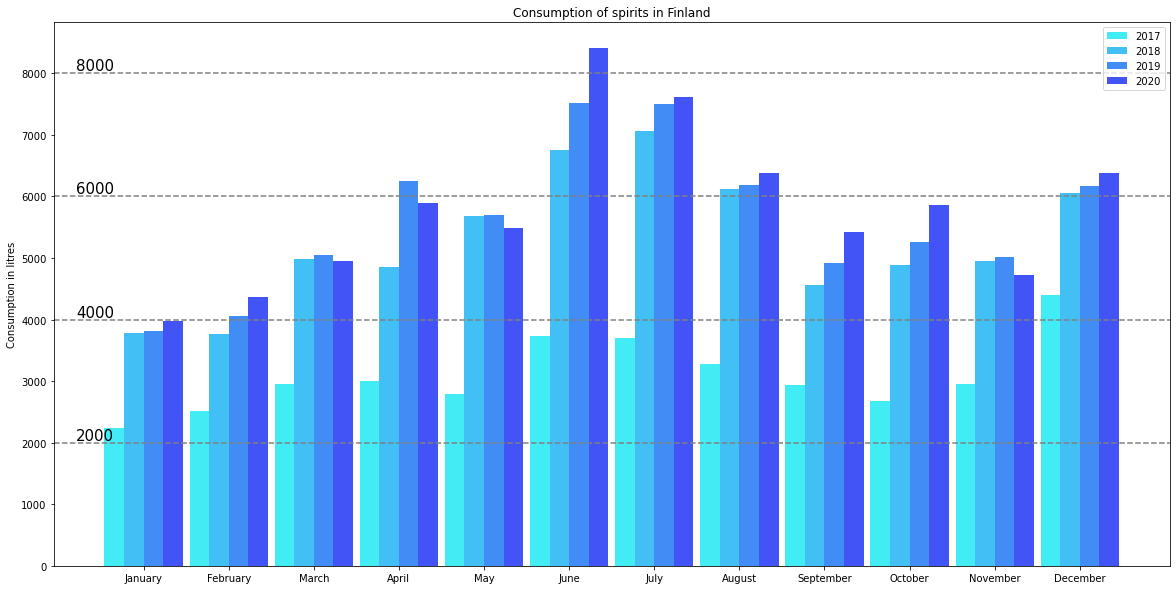

In [103]:
# Wine plotting
spirits2020 = adata2020["Spirits"].values
spirits2019 = adata2019["Spirits"].values
spirits2018 = adata2018["Spirits"].values
spirits2017 = adata2017["Spirits"].values

plt.figure(figsize=(20,10))

plt.bar(bar1, spirits2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, spirits2018, width, label="2018", color="#42bff5")
plt.bar(bar3, spirits2019, width, label="2019", color="#428df5")
plt.bar(bar4, spirits2020, width, label="2020", color="#4254f5")

plt.axhline(y=2000, color="grey", linestyle="--")
plt.text(x=0,y=2000, s="2000", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=4000, color="grey", linestyle="--")
plt.text(x=0,y=4000, s="4000", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=6000, color="grey", linestyle="--")
plt.text(x=0,y=6000, s="6000", fontsize=15, va='bottom', ha='right' )
plt.axhline(y=8000, color="grey", linestyle="--")
plt.text(x=0,y=8000, s="8000", fontsize=15, va='bottom', ha='right' )

plt.ylabel("Consumption in litres")
plt.title("Consumption of spirits in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

In [104]:
# WEATHER DATA
def load_csv(file_name:str):
    df_weather = pd.read_csv(file_name)

    # replace negative snow depth values
    df_weather["Lumensyvyys (cm)"].replace({-1: 0}, inplace=True)

    # Translate relevant column names into English
    df_weather = df_weather.rename(columns={"Kk": "Month", "Pilvien määrä (1/8)": "Cloud cover (1/8)", "Ilmanpaine (msl) (hPa)": "Air pressure(msl) (hPa)",
                                        "Sademäärä (mm)": "Precipitation (mm)", "Lumensyvyys (cm)": "Snow depth (cm)", "Ilman lämpötila (degC)": "Air temperature (degC)",
                                        "Tuulen nopeus (m/s)": "Wind speed (m/s)"})

    # Some random values were missing. Filling method 
    # ffill: propagate last valid observation forward to next valid backfill 
    df_weather = df_weather.fillna(method="ffill")
    
    #count column means by month
    df_mean = df_weather.groupby("Month").mean()

    # drop year and day column
    df_mean = df_mean.iloc[: , 2:]
    

    # limit columns here 
    col = [0,1,2,5,6,11] 
    df_mean = df_mean.iloc[:,col]

    return df_mean

# SUN DATA
def load_sun_csv(file_name:str):
    df_sun = pd.read_csv(file_name, sep=",")

    # Drop the time zone, year, day and time of day
    df_sun = df_sun.drop(["Aikavyöhyke", "Vuosi", "Pv", "Klo"], axis=1)

    # Translate column names into English
    df_sun = df_sun.rename(columns={"Kk": "Month", "Paisteaika (s)": "Sunshine duration (s/min)"})

    # Take monthly mean for sunlight
    df_sun = df_sun.groupby("Month").mean()

    return df_sun
    
#Jyväskylä - Airport
weatherdata_JYV_2020 = load_csv("weather2020-JYV.csv")
weatherdata_JYV_2020 = weatherdata_JYV_2020.merge(load_sun_csv("sun2020-JYV.csv"), on="Month")
weatherdata_JYV_2019 = load_csv("weather2019-JYV.csv")
weatherdata_JYV_2019 = weatherdata_JYV_2019.merge(load_sun_csv("sun2019-JYV.csv"), on="Month")
weatherdata_JYV_2018 = load_csv("weather2018-JYV.csv")
weatherdata_JYV_2018 = weatherdata_JYV_2018.merge(load_sun_csv("sun2018-JYV.csv"), on="Month")
weatherdata_JYV_2017 = load_csv("weather2017-JYV.csv")
weatherdata_JYV_2017 = weatherdata_JYV_2017.merge(load_sun_csv("sun2017-JYV.csv"), on="Month")

#Helsinki - Kumpula
weatherdata_HEL_2020 = load_csv("weather2020-HEL.csv")
weatherdata_HEL_2020 = weatherdata_HEL_2020.merge(load_sun_csv("sun2020-HEL.csv"), on="Month")
weatherdata_HEL_2019 = load_csv("weather2019-HEL.csv")
weatherdata_HEL_2019 = weatherdata_HEL_2019.merge(load_sun_csv("sun2019-HEL.csv"), on="Month")
weatherdata_HEL_2018 = load_csv("weather2018-HEL.csv")
weatherdata_HEL_2018 = weatherdata_HEL_2018.merge(load_sun_csv("sun2018-HEL.csv"), on="Month")
weatherdata_HEL_2017 = load_csv("weather2017-HEL.csv")
weatherdata_HEL_2017 = weatherdata_HEL_2017.merge(load_sun_csv("sun2017-HEL.csv"), on="Month")

#Oulu - ?
weatherdata_OULU_2020 = load_csv("weather2020-OULU.csv")
#weatherdata_OULU_2020 = weatherdata_OULU_2020.merge(load_sun_csv("sun2020-OULU.csv"), on="Month")
weatherdata_OULU_2019 = load_csv("weather2019-OULU.csv")
#weatherdata_OULU_2019 = weatherdata_OULU_2019.merge(load_sun_csv("sun2019-OULU.csv"), on="Month")
weatherdata_OULU_2018 = load_csv("weather2018-OULU.csv")
#weatherdata_OULU_2018 = weatherdata_OULU_2018.merge(load_sun_csv("sun2018-OULU.csv"), on="Month")
weatherdata_OULU_2017 = load_csv("weather2017-OULU.csv")
#weatherdata_OULU_2017 = weatherdata_OULU_2017.merge(load_sun_csv("sun2017-OULU.csv"), on="Month")

#weatherdata_HEL_2020.head()

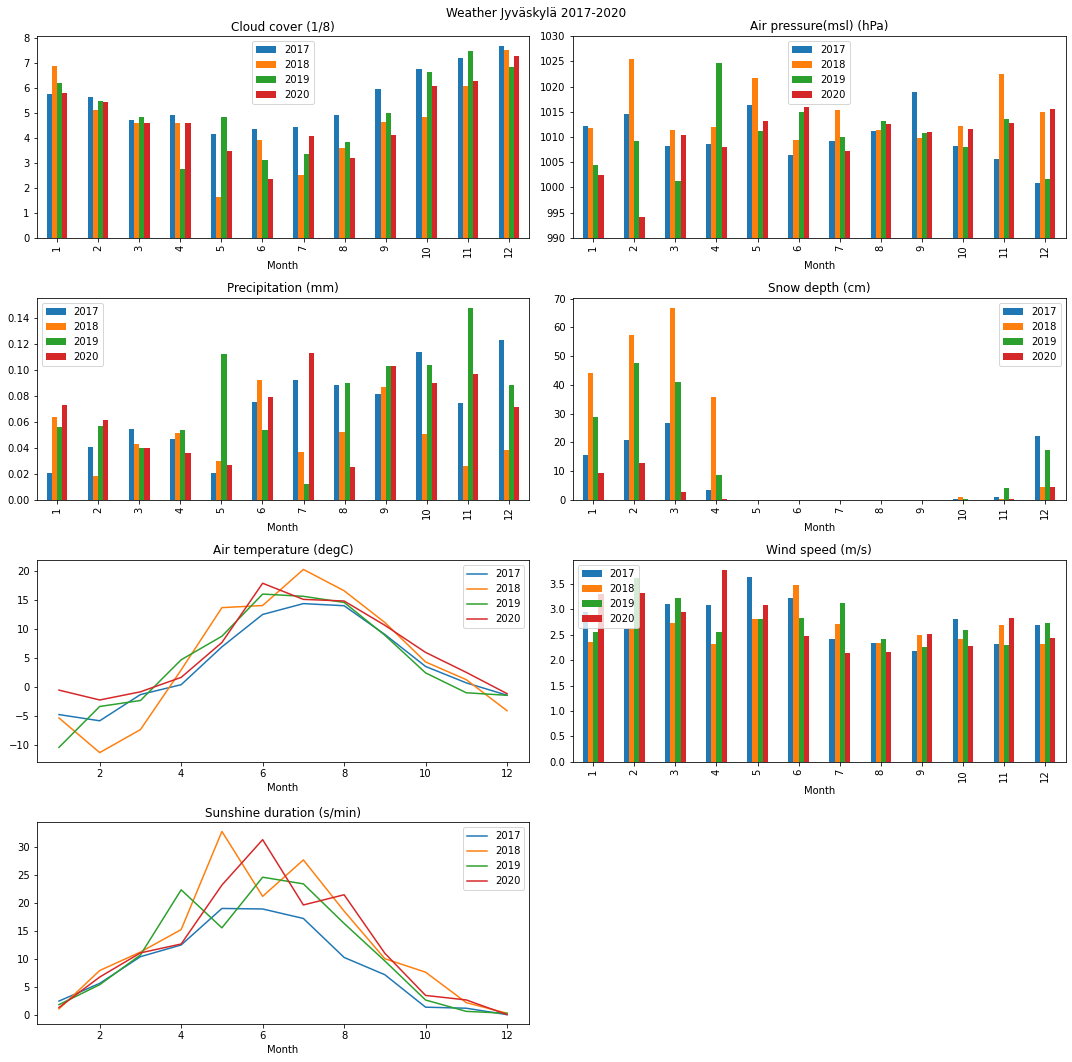

In [105]:
#Weather comparison visualizations
#Jyväskylä 2017-2020
jyv = []
for el in weatherdata_JYV_2017.columns:
       jyv.append(pd.concat([weatherdata_JYV_2017[el],
       weatherdata_JYV_2018[el],
       weatherdata_JYV_2019[el],
       weatherdata_JYV_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

fig, axes = plt.subplots(4, 2, figsize=(15,15))
jyv[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0])
jyv[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1])
#change air pressure scale to make the variations visible 
axes[0,1].set_ylim(990, 1030)
jyv[2].plot.bar(title="Precipitation (mm)", ax=axes[1,0])
jyv[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1])
jyv[4].plot.line(title="Air temperature (degC)", ax=axes[2,0])
jyv[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1],)
jyv[6].plot.line(title="Sunshine duration (s/min)", ax=axes[3,0])

#delete remaining empty plots
fig.delaxes(ax=axes[3,1])

fig.suptitle("Weather Jyväskylä 2017-2020")

'''
#Helsinki 2017-2020
hel = []
for el in weatherdata_HEL_2017.columns:
       hel.append(pd.concat([weatherdata_HEL_2017[el],
       weatherdata_HEL_2018[el],
       weatherdata_HEL_2019[el],
       weatherdata_HEL_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

fig, axes = plt.subplots(4, 2, figsize=(15,15))
hel[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0])
hel[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1])
#change air pressure scale to make the variation more visible 
axes[0,1].set_ylim(990, 1030)
hel[2].plot.bar(title="Precipitation (mm)", ax=axes[1,0])
hel[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1])
hel[4].plot.bar(title="Air temperature (degC)", ax=axes[2,0])
hel[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1])
hel[6].plot.bar(title="Sunshine duration (s/min)", ax=axes[3,0])

#delete remaining empty plots
fig.delaxes(ax=axes[3,1])

fig.suptitle("Weather Helsinki 2017-2020")
'''

plt.tight_layout()
plt.show()
       
    

In [106]:
# LINEAR REGRESSION OF WHOLE DATA

def linear_regression():   

    alc_total2020 = alc_data2020.sum()
    alc_total2019 = alc_data2019.sum()
    alc_total2018 = alc_data2018.sum()
    alc_total2017 = alc_data2017.sum()
    y = alc_total2017.append([alc_total2018, alc_total2019, alc_total2020], ignore_index=True).astype(float)

    # Combine weather data. Sunshine duration is excluded.
    w_total2020 = (weatherdata_HEL_2020.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2020.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2020.astype(float)) / 3
    w_total2019 = (weatherdata_HEL_2019.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2019.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2019.astype(float)) / 3
    w_total2018 = (weatherdata_HEL_2018.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2018.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2018.astype(float)) / 3
    w_total2017 = (weatherdata_HEL_2017.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2017.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2017.astype(float)) / 3

    X = pd.concat([w_total2017, w_total2018, w_total2019, w_total2020], ignore_index=True).astype(float)

    #DEBBUGGING SHOWS THERE ARE NaNs IN YEAR 2018 weather data
    #print(w_total2018[w_total2018.isna().any(axis=1)])
    #print(X[X.isna().any(axis=1)])

    # TEMPORARY solution -> Should be working now without this.
    #X = X.fillna(method="ffill")

    model = LinearRegression(fit_intercept=True)
    fit = model.fit(X, y)

    return (model.coef_, model.intercept_)

print("Parameters:", linear_regression())

Parameters: (array([   583.42120965,    -40.17353654, -33111.00886796,     52.54267091,
          763.84985452,    -49.12812956]), 82590.79789181022)
